### UNIDAD DOS: MODELOS DE CLASIFICACIÓN

### Selección de características

La selección de características, también conocida como selección de variables, selección de atributos o selección de subconjuntos de variables, es un método que se utiliza para seleccionar un subconjunto de características (variables, dimensiones) de un conjunto de datos inicial. La selección de características es un paso clave en el proceso de creación de modelos de aprendizaje automático y puede tener un gran impacto en el rendimiento de un modelo.

El uso de características correctas y relevantes como valores de entrada a un modelo, puede reducir la posibilidad de generar sobre entrenamiento, porque al disponer de las características más relevantes se elimina el uso de características con ruido que no agregan valor a la señal de entrada. Si se tiene que introducir menos funciones de entrada, permite reducir la cantidad de tiempo que se tarda en entrenar un modelo. Aprender qué características se deben seleccionar es una habilidad que deben desarrollar los científicos, y que puede ser más un arte que una ciencia. La selección de funciones es importante porque puede:

- Acortar los tiempos de entrenamiento
- Simplificar los modelos y hacerlos más fáciles de interpretar.
- Mejorar el rendimiento del conjunto de pruebas al reducir el sobreajuste (sobre entrenamiento)

Una razón importante para descartar características sería la alta correlación y redundancia entre las variables de entrada o la irrelevancia de ciertas características. Por tanto, estas variables de entrada pueden eliminarse sin incurrir en mucha pérdida de información. Redundante e irrelevante son dos nociones distintas, ya que una característica relevante puede ser redundante en presencia de otra característica relevante con la que está fuertemente correlacionada.

La ingeniería de características es lo opuesto, de alguna manera, a la selección de características. Con la selección de características, se eliminan variables. En cambio, en la ingeniería de características se crean nuevas variables para mejorar el modelo. En muchos casos, se está utilizando el conocimiento del dominio para mejorar el modelo.

### Ejemplo

Existe un sitio de bienes raíces en los EE. UU que permite a los agentes de bienes raíces y a los propietarios de viviendas listar casas en alquiler o en venta. El sitio, Zillow, es famoso, entre otras cosas, por su Zestimate. El Zestimate es un precio estimado mediante el aprendizaje automático. Es el precio en que Zillow estima que se venderán las viviendas si se pusieran hoy en el mercado. Los Zestimates son constantemente actualizados y recalculados.

Los detalles exactos del algoritmo Zestimate son propietarios, pero podemos hacer algunas suposiciones. Para ello, vamos a explorar cómo podremos crear nuestro propio Zestimate. Vamos a crear una lista de posibles variables de entrada para nuestro modelo de aprendizaje automático y las razones por las que podrían ser valiosas:
    
- **Pies cuadrados**: Intuitivamente, cuanto más grande es la casa, más caro será.
- **Número de habitaciones**: Más habitaciones, más costo.
- **Cantidad de baños**: Los dormitorios necesitan baños.
- **Tasas de interés hipotecarias**: si las tasas son bajas, pagos más bajos, lo que significa que los posibles propietarios pueden pagar una casa más cara.
- **Año de construcción**: en general, las casas nuevas suelen ser más caras que las casas antiguas. Las casas antiguas normalmente necesitan más reparaciones.
- **Impuestos a la propiedad**: si los impuestos a la propiedad son altos, eso aumentará los pagos mensuales y los propietarios solo podrán pagar una casa menos costosa.
- **Color de la casa**: a primera vista, puede que no parezca una variable relevante, pero ¿y si la casa está pintada de verde lima?
- **Código postal**: ubicación, ubicación, ubicación. En- el sector inmobiliario, la ubicación de una casa es un factor determinante del precio de la casa. En algunos casos, una casa en un sitio puede valer cientos de miles de dólares más que una casa en la siguiente cuadra. La ubicación puede ser verdaderamente importante.
- **Ventas comparativas**: una de las métricas que utilizan habitualmente los tasadores y agentes inmobiliarios al valorar una vivienda, es buscar propiedades similares a la propiedad en cuestión, que han sido vendidas recientemente o al menos están a la venta, para ver cuál es el precio de venta actual.
- **Evaluación de impuestos**: los impuestos a la propiedad se calculan en función de lo que la curaduría cree que la propiedad vale actualmente. Esta es información de carácter público.
    
Todas estas variables podrían ser potencialmente predictivas, pero intuitivamente podemos asumir que los pies cuadrados, la cantidad de dormitorios y la cantidad de baños están altamente correlacionados.

Además, intuitivamente, los pies cuadrados proporcionan más precisión que el número de dormitorios o el número de baños. Por lo tanto, probablemente podamos reducir el número de dormitorios y el número de baños y mantener los pies cuadrados y no perder mucha precisión. De hecho, podríamos aumentar potencialmente la precisión al reducir el ruido de variables que no agregan valor. Podría ocurrir, por ejemplo, que podamos eliminar el color de la casa sin perder precisión de manera importante.

Las funciones que se pueden eliminar sin afectar la precisión del modelo se dividen significativamente en dos categorías:

- Redundante: esta es una característica que está altamente correlacionada con otras características de entrada y, por lo tanto, no agrega mucha información nueva a la señal.
- Irrelevante: esta es una característica que tiene una baja correlación con la característica de destino y por esa razón proporciona más ruido que señal.

Una forma de averiguar si nuestras suposiciones son correctas es entrenar nuestro modelo con y sin nuestras suposiciones y ver qué produce los mejores resultados. Podríamos usar este método con todas las funciones, pero en los casos en los que tenemos una gran cantidad de funciones, la cantidad posible de combinaciones puede aumentar rápidamente.

Como mencionamos anteriormente, el análisis exploratorio de datos puede ser una buena manera de obtener una comprensión intuitiva y de obtener información sobre el conjunto de datos con el que estamos trabajando. Analicemos tres enfoques que se utilizan comúnmente para obtener estos conocimientos. Son:

- Importancia de la característica
- Selección univariante
- Matriz de correlación con mapa de calor

### Importancia de la característica

La importancia de cada característica de un conjunto de datos se puede establecer mediante este método.

La importancia de la característica proporciona una puntuación para cada característica en un conjunto de datos. Una puntuación más alta significa que la función tiene más importancia o relevancia en relación con la función de salida.

La importancia de la característica es normalmente una clase incorporada que viene con clasificadores basados en árboles. En el siguiente ejemplo, usamos el Clasificador de árbol adicional para determinar las cinco características principales en un conjunto de datos:

In [28]:
# Selección de características
# ==============================================================

# Importar Librerías
# --------------------------------------------------------------
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos de entrenamiento
# --------------------------------------------------------------
data = pd.read_csv("train.csv")

X = data.iloc[:,0:20] # Columnas independientes
y = data.iloc[:,-1] # Elija la última columna para la función de destino

print("data.iloc => X: \n\n", X, "\n")
print("data.iloc => y: \n\n", y, "\n")

data.iloc => X: 

       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns] 

data.iloc => y: 

 0        7
1       53
2       41
3       10
4       44
    

In [29]:
# Modelo de clasificación
# ------------------------------------------------------------
modelo = ExtraTreesClassifier()

# Entrenamiento
modelo.fit(X,y)

print(modelo.feature_importances_) # Utilizar clase incorporada

[0.21028229 0.01671646 0.15938297 0.01657523 0.14871794 0.03184181
 0.4164833 ]


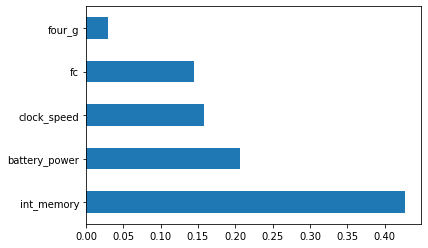

In [30]:
# Importancia de las características de los 
# clasificadores basados en árboles.

# Se traza un gráfico de importancia de las características para una 
# mejor visualización
# --------------------------------------------------------------

modelo = ExtraTreesClassifier()
modelo.fit(X,y)

# Cálculo valores importancia
# --------------------------------------------------------------
valores_importancia = pd.Series(modelo.feature_importances_, index=X.
columns)
valores_importancia.nlargest(5).plot(kind='barh')
plt.show()

### Selección univariante

Se pueden usar pruebas estadísticas para determinar qué características tienen la correlación más fuerte con la variable de salida. La biblioteca scikit-learn tiene una clase llamada SelectKBest que proporciona un conjunto de pruebas estadísticas para seleccionar las K "mejores" características en un conjunto de datos.

El siguiente es un ejemplo que usa la prueba estadística de chi-cuadrado (chi²) para características no negativas para seleccionar las cinco mejores características en un conjunto de datos de entrada:

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv("train.csv")

X = data.iloc[:,0:20] # Columnas independientes
y = data.iloc[:,-1] # Elegir última columna de características

# Aplica la clase SelectKBest para extraer las 5 mejores características
# ----------------------------------------------------------------------
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
print(scores.nlargest(5,'score')) # Imprime las 5 características

           specs         score
6     int_memory  20539.050302
0  battery_power  11058.155685
4             fc    290.812265
1           blue     36.976457
3       dual_sim     36.485969


### Matriz de correlación con mapa de calor

Existe una correlación entre dos características cuando existe una relación entre los diferentes valores de las características. Por ejemplo, si los precios de las viviendas suben a medida que aumentan los pies cuadrados, se dice que estas dos características están correlacionadas positivamente. Puede haber diferentes grados de correlación. Si una característica cambia constantemente en relación con otra característica, se dice que estas características están altamente correlacionadas.

La correlación puede ser positiva (un aumento en un valor de una característica aumenta el valor de la variable de destino) o negativa (un aumento en un valor de una característica disminuye el valor de la variable de destino).

La correlación es un valor continuo entre -1 y 1:

- Si la correlación entre dos variables es 1, existe una correlación directa perfecta.
- Si la correlación entre dos características es -1, existe una correlación inversa perfecta.
- Si la correlación es 0 entre dos características, no hay correlación entre las dos características.

Un mapa de calor facilita la identificación de las características que están más correlacionadas con la variable de destino. Trazaremos un mapa de calor de características correlacionadas usando la biblioteca seaborn, usando el siguiente código:

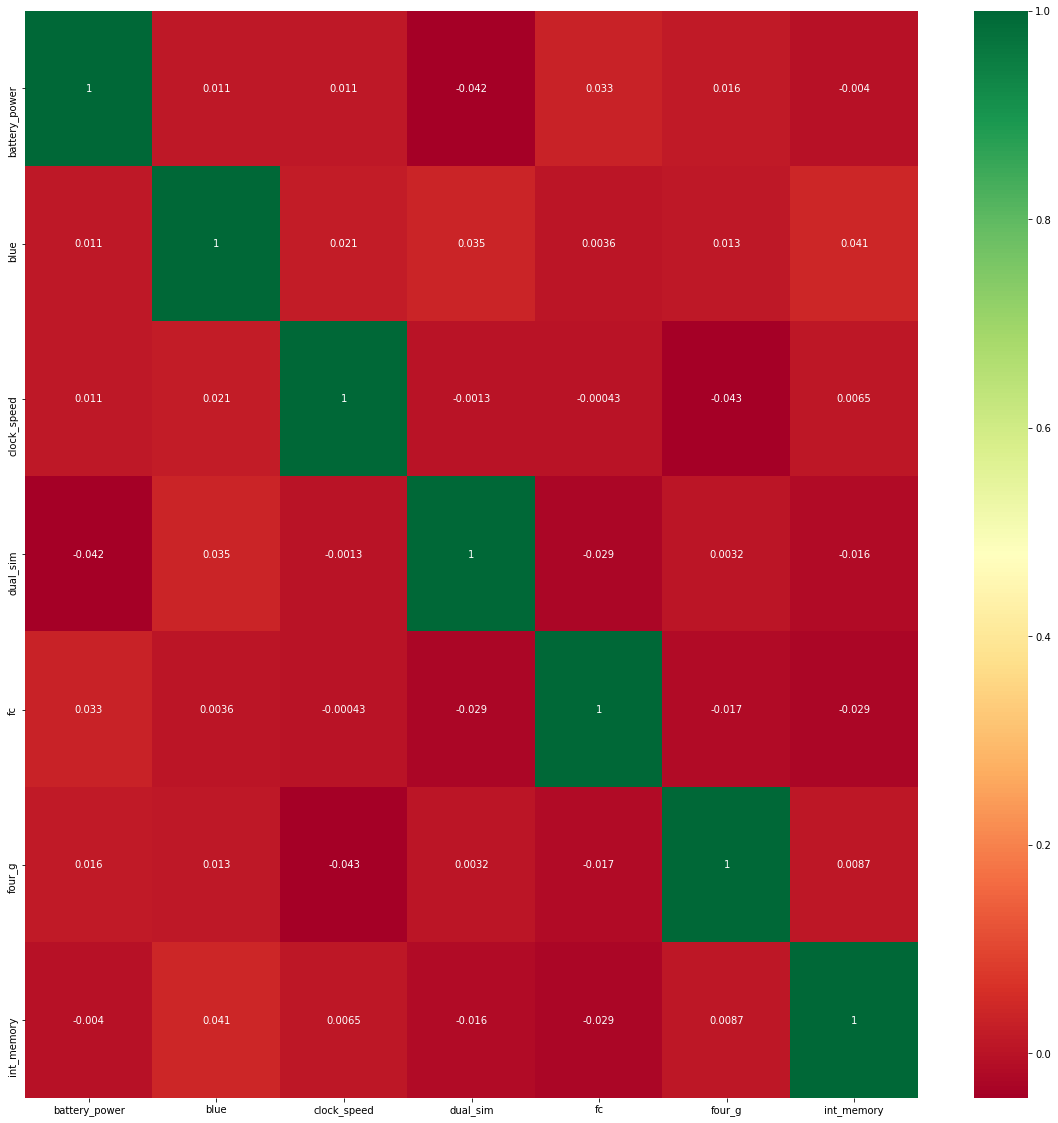

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] # Columnas independientes
y = data.iloc[:,-1] # Elegir última columna de características

# Obtiene las correlaciones de cada característica
# en el dataset
# -------------------------------------------------------------------
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))

# Dibuja el mapa de calor
# -------------------------------------------------------------------
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Métodos basados en capas

Cuando se utilizan métodos de capas, el problema de la selección de características se reduce esencialmente a un problema de búsqueda mediante estos pasos:

1. Se usa un subconjunto de características para entrenar un modelo
2. Según los resultados de cada iteración, las características se agregan o se eliminan del subconjunto

Los métodos de envoltura suelen ser computacionalmente costosos.

Los siguientes son unos cuantos ejemplos:
    
- **Selección directa**: El método de selección directa es un proceso iterativo que comienza sin tener características en el conjunto de datos. Durante cada iteración, se agregan características con la intención de mejorar el rendimiento del modelo. Si se mejora el rendimiento, se mantienen las funciones. Las características que no mejoran los resultados se descartan. El proceso continúa hasta que se detiene la mejora del modelo.

- **Eliminación hacia atrás**: cuando se utiliza el método de eliminación hacia atrás, todas las características están inicialmente presentes en el conjunto de datos. Las características con la menor importancia se eliminan durante cada iteración, y el proceso luego verifica si mejora el rendimiento del modelo. El proceso se repite hasta que no se observa una mejora significativa.

- **Eliminación de características recursivas**: el método de eliminación de características recursivas es un algoritmo de optimización codicioso con el objetivo declarado de encontrar el subconjunto de características con mejor rendimiento. Crea modelos de forma iterativa y almacena la característica de mejor o peor rendimiento durante cada iteración.Luego se construye el siguiente modelo con las características restantes hasta que se agotan todas las características. A continuación, las características se clasifican según el orden de su eliminación.
    
### MÉTODOS BASADOS EN FILTROS

Se especifica una métrica y, en función de esa métrica, se filtran las características.

Ejemplos de métodos basados en filtros:

- **Correlación de Pearson**: este algoritmo se utiliza como medida de cuantificar la dependencia lineal entre dos variables continuas X e Y. Su valor puede estar entre -1 y +1.

- **Análisis discriminante lineal (LDA)**: LDA se puede utilizar para encontrar una combinación lineal de características que caracterizan o separan dos o más niveles (o clases) de una variable categórica.

- **Análisis de varianza (ANOVA)**: ANOVA es como LDA excepto que se calcula utilizando una o más variables independientes categóricas y una variable dependiente continua. Proporciona una prueba estadística para determinar si la media de varios grupos es igual o no.

- **Chi-Cuadrado**: Chi-Cuadrado es una prueba estadística aplicada a grupos de variables categóricas para determinar la probabilidad de correlación o asociación entre ellas usando su distribución de frecuencia.

Un aspecto a tener en cuenta es que los métodos basados ​​en filtros no eliminan la multicolinealidad. Por lo tanto, se debe realizar un procesamiento adicional para lograr la multicolinealidad de características antes de crear modelos a partir de sus datos de entrada.

### Métodos Integrados
Los métodos integrados utilizan algoritmos con selección de funciones integradas. Los métodos integrados combinan las ventajas del filtro y los métodos de envoltura. Normalmente se implementan mediante algoritmos con métodos de selección de funciones incorporadas.

A continuación, se muestran dos implementaciones populares de métodos integrados:

- **Regresión de lazo**: Realiza la regularización L1, que agrega una penalidad equivalente al valor absoluto de la magnitud de coeficientes.
- **Regresión de cresta**: realiza la regularización L2, que agrega una penalización equivalente al cuadrado de la magnitud de los coeficientes.

Estos algoritmos también se utilizan comúnmente:

- **Algoritmo memético**
- **Logit multinomial aleatorio**
- **Árboles regularizados**

En el siguiente tema trataremos la ingeniería de características. La selección de características trata sobre cómo podemos reducir el número de variables para aumentar la precisión. La ingeniería de características es lo contrario. Pregunta: ¿cómo podemos crear nuevas variables que permitan que nuestros modelos sean más eficientes?

### Ingeniería de características

Según una encuesta reciente realizada por la gente de Forbes, los científicos de datos dedican alrededor del 80% de su tiempo a la preparación de datos:
    
Esta estadística destaca la importancia de la preparación de datos y la ingeniería de características en la ciencia de datos.

Al igual que la selección de características, juiciosa y sistemática, puede permitir la construcción de modelos de manera más rápida y con un mayor rendimiento al eliminar características, la ingeniería de características puede lograr lo mismo agregando nuevas características. Esto parece contradictorio a primera vista, pero las características que se están agregando no son las características que fueron eliminadas por el proceso de selección de características. Las características que se agregan son características que podrían no haber estado en el conjunto inicial de datos. Su algoritmo de aprendizaje podría ser muy inteligente, pero si sus características de entrada no son relevantes, no se podrán generar resultados que sean de utilidad.  Vamos a analizar un par de ejemplos sencillos para hacernos a una idea de lo que esto significa.

En un problema de morosidad en los pagos, podría suponerse que un prestatario tendrá menos probabilidades de incumplimiento si posee un salario alto. De manera similar, podríamos asumir que los prestatarios que tienen un elevado saldo en sus tarjetas de crédito, tendrán dificultades para devolver esos saldos pendientes de pago, en comparación con alguien que tiene saldos bajos en sus tarjetas.

Ahora que tenemos ese nuevo conocimiento, intentemos intuitivamente determinar quién va a devolver un préstamo y quién no. Si el prestatario A tiene un saldo en sus tarjetas de crédito de 10.000 y el prestatario B tiene un saldo de 20.000, ¿quién cree que tiene una mayor probabilidasd de pagar su deuda? Si no se proporciona otra información, diríamos que el prestatario A es una opción más segura. Ahora, ¿y si dijeramos que el prestatario A tiene un ingreso anual de 20.000 por año y el prestatario B tiene un ingreso de 100.000? Eso cambia todo, ¿no es así? ¿Cómo podemos capturar cuantitativamente la relación entre las dos características? Los bancos suelen utilizar lo que llaman deuda para relación de ingresos (**DTI**) y se calcula de la siguiente manera:

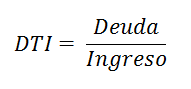

Entonces, el prestatario A tendría un DTI de 0.50 y el prestatario B tiene 0,20. En otras palabras, el prestatario A gana el doble de su deuda es, y el prestatario B tiene 5 veces su deuda. El prestatario B tiene más probabilidades para pagar su deuda. Ciertamente podemos agregar otras características a los perfiles de estos prestatarios que cambiarían la composición de sus perfiles, pero lo expresado ayuda a ilustrar el concepto de ingeniería de características.

Más formalmente, la ingeniería de características es el proceso que un científico de datos utiliza para mejorar la capacidad predictiva de un modelo de aprendizaje automático. La ingeniería de características es una concepto fundamental en el aprendizaje automático y puede ser muy difícil como costoso. Muchos científicos de datos quieren saltar directamente al modelo de selección, pero la capacidad de discernir qué nuevas características mejorarán un modelo, es una habilidad fundamental que puede llevar años dominar.

El proceso de ingeniería de características se puede describir de la siguiente manera:

1. Hacer una lluvia de ideas sobre qué funciones son relevantes
2. Decidir qué funciones pueden mejorar el rendimiento del modelo.
3. Crear nuevas funciones
4. Determinar si las nuevas características se suman al rendimiento del modelo; si
no, cancelarlos
5. Vuelva al paso 1, hasta que el rendimiento del modelo cumpla con las expectativas

Como vimos en el ejemplo anterior, tener conocimiento del dominio y tener familiaridad con el conjunto de datos puede resultar útil para la ingeniería de características.

Sin embargo, también existen algunas técnicas genéricas de ciencia de datos que pueden ser aplicado en la preparación de datos y pasos de ingeniería de características independientemente del dominio. Dediquemos un tiempo a analizar estos técnicas. Las técnicas que exploraremos son:

- Imputación
- Gestión de valores atípicos
- Codificación one-hot
- Transformación logarítmica
- Escalado
- Manipulación de fechas

### Imputación

No es raro que los conjuntos de datos sean imperfectos. Tener filas de valores con datos perdidos  es un problema común. Puede haber muchas razones sobre el porqué faltan valores:

- Conjuntos de datos inconsistentes
- Error administrativo
- Problemas de privacidad

Independientemente del motivo, la falta de valores puede afectar el rendimiento de un modelo y, en algunos casos, puede llevar a que fallen algunos algoritmos que manejan mal la pérdida de valores.

Existen múltiples técnicas para manejar los valores perdidos. Estas técnicas incluyen:

- **Eliminar la fila con valores perdidos**: esta técnica puede reducir el rendimiento del modelo porque reduce la cantidad de datos para el conjunto de entrenamiento.

Veamos un ejemplo que descarta columnas donde más del 60% de datos no están disponibles:

In [33]:
threshold = 0.6

# Eliminar columnas con una tasa de valor perdido superior al umbral
# ------------------------------------------------------------------
data = data[data.columns[data.isnull().mean() < threshold]]

# Eliminar filas con una tasa de valor faltante superior al umbral
# ------------------------------------------------------------------
data = data.loc[data.isnull().mean(axis=1) < threshold]
threshold = 0.6

# Eliminar columnas con una tasa de valor perdido superior al umbral
# ------------------------------------------------------------------
data = data[data.columns[data.isnull().mean() < threshold]]

# Eliminar filas con una tasa de valor faltante superior al umbral
# ------------------------------------------------------------------
data = data.loc[data.isnull().mean(axis=1) < threshold]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### Imputación numérica

La imputación es otro método para tratar valores faltantes. La imputación simplemente significa reemplazar el valor faltante con otro valor que "tiene sentido".

En el caso de las variables numéricas, estos son reemplazos comunes:

- Usar cero como valor de reemplazo es una opción
- Calcular la media para el conjunto de datos completo, y reemplazar los valores faltantes con la media calculada
- Calcular el promedio para el conjunto de datos completo y reemplazar los valores faltantes con el promedio calculado

Normalmente es preferible usar la media en lugar del promedio, porque el promedio es más susceptible de verse afectado por valores atípicos. Veamos un un par de ejemplos para hacer este reemplazo:

In [34]:
# Llenando todos los valores perdidos con cero
# ------------------------------------------------------------------
data = data.fillna(0)

# Llenando los valores perdidos con la mediana de todas las columnas
# ------------------------------------------------------------------
data = data.fillna(data.median())
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### Imputación Categórica

Las variables categóricas no contienen números, sino categorías. Por ejemplo, rojo, verde y amarillo. O plátano, manzana y naranja. Por lo tanto, los promedios y las medias no se pueden utilizar con variables categóricas. Una técnica común es reemplazar cualquier valor faltante con el valor que más aparece.

En los casos en los que existen muchas categorías, o las categorías se distribuyen de manera uniforme, puede tener sentido usar algo como "Otro". Veamos un ejemplo en Python que reemplaza todos los valores faltantes con el valor que ocurre más a menudo (idxmax en Python devuelve el valor más común en una característica):

In [35]:
# Función de relleno máximo para columnas categóricas
# ---------------------------------------------------------
import pandas as pd

data = pd.read_csv("dataset.csv")
data['color'].fillna(data['color'].value_counts().idxmax(),
inplace=True)
print(data)

    index   color
0       0   green
1       1  yellow
2       2    red 
3       3    red 
4       4  purple
5       5    red 
6       6    red 
7       7  purple
8       8    red 
9       9    red 
10     10  yellow
11     11    red 
12     12   black
13     13   white


### Gestión de valores atípicos

Los precios de las viviendas son un buen dominio para comprender por qué es necesario prestar especial atención a los valores atípicos. Independientemente de la región del mundo en el que viva, la mayoría de las casas de tu vecindario van a caer en un cierto rango y van a tener ciertas características.

Quizás algo como esto:

- 1 a 4 dormitorios
- 1 cocina
- 500 a 3000 pies cuadrados
- 1 a 3 baños

El precio promedio de una vivienda en los EE. UU. en 2019, es de 226,800. Y supongo que tu casa probablemente compartirá algunas de las características mencionadas. Pero también puede haber un par de casas que sean atípicas. Tal vez una casa que tiene 10 o 20 habitaciones. Algunas de estas casas pueden estar entre un millón a 10 millones de dólares, dependiendo del número de aspectos excéntricos que puedan tener esas casas.

Como puede imaginar, estos valores atípicos afectarán la media en un conjunto de datos. Por eso, y dado que existen no muchas de estas casas, podría ser mejor eliminar estos valores atípicos para no afectar las predicciones con los otros puntos de datos más comunes.

Veamos una gráfica de algunos valores de las casas y luego tratemos de dibujar dos líneas del mejor ajuste: una con todos los datos y otra con los valores atípicos eliminados.
    
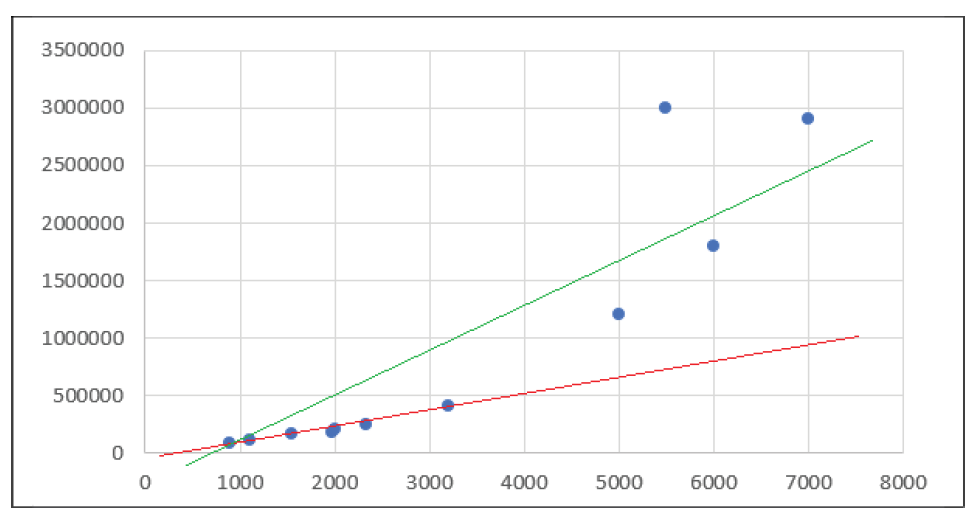

Como puede ver, si elimina los valores atípicos del cálculo de la línea de mejor ajuste, la línea predice la vivienda de menor precio con mucha más precisión. Por esta razón, simplemente la eliminación de los valores atípicos es una forma simple pero poderosa de lidiar con la influencia de los valores atípicos.

Entonces, ¿cómo podemos determinar si un dato es un valor atípico y por tanto debe eliminarse?

Un método común es el de eliminar los valores atípicos que caen en un cierto múltiplo de la desviación estándar de los valores de una característica en un conjunto de datos. Determinar qué constante se debe usar para elegir el factor de multiplicación, es más un arte que una ciencia, pero un valor entre 2 y 4 es bastante común:

In [36]:
# Eliminar las filas de valores atípicos con desviación estándar
# ---------------------------------------------------------------------

import pandas as pd
data = pd.read_csv("train.csv")

# Eliminar las filas de valores atípicos con desviación estándar
# ---------------------------------------------------------------------
factor = 2
upper_lim = data['battery_power'].mean () + data['battery_power'].std() * factor
lower_lim = data['battery_power'].mean () - data['battery_power'].std() * factor
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### Percentiles

Otro método para detectar y eliminar valores atípicos es utilizar percentiles. Con este método, simplemente asumimos que un cierto porcentaje de los valores de una característica son valores atípicos. Qué porcentaje de valores eliminar es nuevamente subjetivo y dependerá del dominio. Veamos un ejemplo de Python donde eliminamos el 1% superior e inferior:

In [37]:
# Eliminar las filas de valores atípicos con percentiles
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data = data[(data['battery_power'] < upper_lim) & 
            (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994            858     0          2.2         0   1       0          50
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46

[1957 rows x 7 columns]


### Limitación de valores

Una forma alternativa de manejar los valores atípicos es limitar los valores en lugar de eliminarlos. Limitar valores en lugar de eliminar filas le permite mantener los datos y aumentar potencialmente el rendimiento de los modelos. Sin embargo, mantener los datos pero limitar sus valores hace que los datos señalen una estimación en lugar de una observación real, lo que también podría afectar los resultados. Decidir qué método utilizar dependerá del análisis del conjunto de datos específico disponible. A continuación, se muestra un ejemplo que utiliza valores de limitación en lugar de eliminación de filas:

In [38]:
# Cubrir las filas de valores atípicos con percentiles
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data.loc[(data['battery_power'] > upper_lim), 'battery_power'] = upper_lim
data.loc[(data['battery_power'] < lower_lim), 'battery_power'] = lower_lim
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0             842.0     0          2.2         0   1       0           7
1            1021.0     1          0.5         1   0       1          53
2             563.0     1          0.5         1   2       1          41
3             615.0     1          2.5         0   0       0          10
4            1821.0     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994          858.0     0          2.2         0   1       0          50
1995          794.0     1          0.5         1   0       1           2
1996         1965.0     1          2.6         1   0       0          39
1997         1911.0     0          0.9         1   1       1          36
1998         1512.0     0          0.9         0   4       1          46

[1957 rows x 7 columns]


### Codificación one-hot (un bit activo a la vez)

La codificación one-hot es una técnica de uso frecuente en el aprendizaje automático para la ingeniería de características. Algunos algoritmos de aprendizaje automático no pueden manejar características categóricas, por lo que la codificación one-hot es una forma de convertir estas características categóricas en características numéricas. Supongamos que tiene una función etiquetada como "estado" que puede tomar uno de tres valores (rojo, verde o amarillo). Debido a que estos valores son categóricos, no existe un concepto de qué valor es mayor o menor. Podríamos convertir estos valores en valores numéricos y eso les daría esta característica. Por ejemplo:

Yellow = 1

Red = 2

Green = 3

Pero esto parece algo arbitrario. Si supiéramos que el rojo es malo y el verde es bueno, y el amarillo está en algún lugar en el medio, podríamos cambiar el mapeo a algo como:
    
Red = -1

Yellow = 0

Green = 1

Y eso podría producir un mejor rendimiento. Pero ahora veamos cómo este ejemplo se puede codificar en directo. Para lograr la codificación one-hot de esta variable, creamos una nueva característica para cada uno de los valores. En este caso, algunos de nuestros datos (algo que puede encontrar en la naturaleza) podrían verse así:

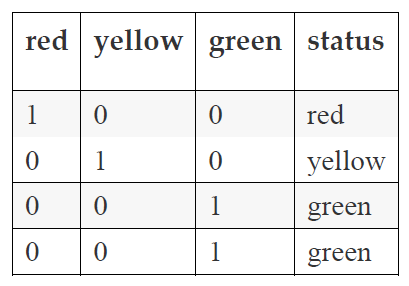

Dado que hemos codificado los datos en un formato one-hot, la función de estado ahora se vuelve redundante, por lo que podemos eliminarla de nuestro conjunto de datos:
    
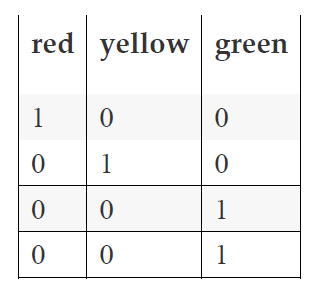

Además, podemos calcular el valor de cualquiera de las características de color de las otras dos posibilidades. Si el rojo y el amarillo son ambos 0, eso significa que el verde debe ser 1 y así sucesivamente. Entonces, en la codificación one-hot, siempre podemos eliminar una de las características sin perder información. Algo como esto:
    
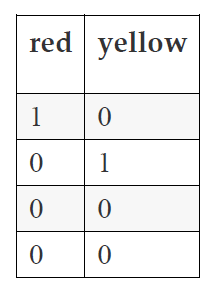

Veamos ahora un ejemplo sobre cómo podemos usar la biblioteca Pandas para codificar una característica en directo usando la función get_dummies:

In [39]:
import pandas as pd
data = pd.read_csv("dataset.csv")
columnas_codificadas = pd.get_dummies(data['color'])
data = data.join(columnas_codificadas).drop('color', axis=1)
print(data)

    index  black  green  purple  red   white  yellow
0       0      0      1       0     0      0       0
1       1      0      0       0     0      0       1
2       2      0      0       0     0      0       0
3       3      0      0       0     1      0       0
4       4      0      0       1     0      0       0
5       5      0      0       0     1      0       0
6       6      0      0       0     1      0       0
7       7      0      0       1     0      0       0
8       8      0      0       0     0      0       0
9       9      0      0       0     1      0       0
10     10      0      0       0     0      0       1
11     11      0      0       0     0      0       0
12     12      1      0       0     0      0       0
13     13      0      0       0     0      1       0


### Transformación logarítmica

La transformación logarítmica es una transformación de ingeniería de características bastante común. La transformación de registros ayuda a aplanar valores muy sesgados. Una vez aplicada la transformación logarítmica, la distribución de datos se normaliza.

Repasemos otro ejemplo para volver a ganar algo de intuición sobre esta temática. Recuerde cuando tenía 10 años y miraba a niños y niñas de 15 y pensaba: "¡Son mucho mayores que yo!" Ahora piense en una persona de 50 años y otra de 55 años. En este caso, podría pensar que la diferencia de edad no es tanta. En ambos casos, la diferencia de edad es de 5 años. Sin embargo, en el primer caso, un joven de 15 años es 50 por ciento mayor que el de 10 años, y en el segundo caso, el de 55 años es sólo un 10 por ciento mayor que el de 50 años.
    
Si aplicamos una transformación logarítmica a todos estos puntos de datos, se logra normalizar diferencias de magnitud como la indicada.

La aplicación de una transformación logarítmica también disminuye el efecto de los valores atípicos, debido a la normalización de las diferencias de magnitud, y por tanto los modelos que utilizan transformaciones logarítmicas se vuelven más robustos.

Una restricción clave a considerar al usar esta técnica es que solo debe aplicar transformaciones logarítmicas cuando todos los puntos de datos sean valores positivos. Además, puede agregar 1 a sus datos antes de aplicar la transformación. Por lo tanto, con esto se asegura que el resultado de la transformación sea positivo:
    
Log(x + 1)

Así es como puede realizar la transformación de registro en Python:

In [40]:
# Ejemplo de transformación logarítmica
# --------------------------------------------------------------------
data = pd.DataFrame({'value':[3,67, -17, 44, 37, 3, 31, -38]})
data['log+1'] = (data['value']+1).transform(np.log)

# Manejo de valores negativos
# Note que los valores son diferentes
# --------------------------------------------------------------------
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
print(data)

   value     log+1       log
0      3  1.386294  3.737670
1     67  4.219508  4.663439
2    -17       NaN  3.091042
3     44  3.806662  4.418841
4     37  3.637586  4.330733
5      3  1.386294  3.737670
6     31  3.465736  4.248495
7    -38       NaN  0.000000


### Escalamiento

En muchos casos, las características numéricas de un conjunto de datos pueden variar mucho en escala entre las diferentes características del modelo. Por ejemplo, los pies cuadrados típicos de una casa pueden variar entre 1000 y 3000 pies cuadrados, mientras que los valores 2, 3 o 4 pueden ser un número más típico para el número de dormitorios en una casa. Si dejamos estos valores tal como se expresa, las características con una escala más alta podrían recibir una ponderación más elevada, a pesar de que su naturaleza es diferente. ¿Cómo se puede solucionar este problema?

El escalado puede ser una forma de resolver esta dificultad. Las características continuas se vuelven comparables en términos de rango después de aplicar la escala. No todos los algoritmos requieren valores escalados (Random Forest es un ejemplo), pero otros algoritmos producirán resultados sin sentido si el conjunto de datos no se escalan de antemano (los ejemplos son k vecinos más cercanos o k medias). Ahora exploraremos los dos métodos de escalado más comunes.

La normalización (o normalización minmax) permite escalar todos los valores de una característica dentro de un rango fijo entre 0 y 1. Más formalmente, cada valor de una característica se puede normalizar mediante la fórmula:
    
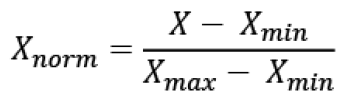

Dónde:

- **X**: cualquier valor dado para una característica
- **Xmin**: el valor más pequeño de todos los puntos de datos en el conjunto de datos
- **Xmax**: el valor más grande de todos los puntos de datos en el conjunto de datos
- **Xnorm**: el valor normalizado después de aplicar la fórmula

La normalización no cambia la distribución de la característica, y debido a la disminución de las desviaciones estándar el efecto de los valores atípicos aumenta. Por esta razón, se recomienda manejar los valores atípicos antes de la normalización. Y ahora, veamos un ejemplo en Python:

In [41]:
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
print(data)

   value  normalized
0      7    0.450000
1     25    0.600000
2    -47    0.000000
3     73    1.000000
4      8    0.458333
5     22    0.575000
6     53    0.833333
7    -25    0.183333


### Estandarización

La estandarización (o normalización del puntaje z) es un método de escala que incluye la desviación estándar como parte del cálculo.

La estandarización minimiza y suaviza el efecto de valores atípicos en la escala. Veamos cómo se puede calcular:
    
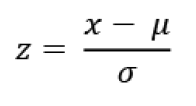

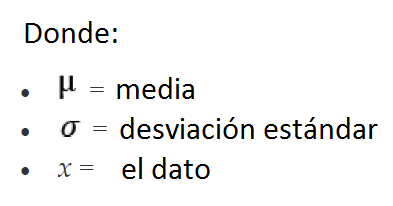

Y calculando con Python:

In [42]:
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
print(data)

   value  standardized
0      7     -0.193539
1     25      0.270954
2    -47     -1.587017
3     73      1.509601
4      8     -0.167733
5     22      0.193539
6     53      0.993498
7    -25     -1.019303


### Manipulación de fechas

Las funciones de manejo del tiempo pueden ser de importancia crítica para algunos problemas de la ciencia de datos. En el análisis de series de tiempo, las fechas son obviamente críticas. Predecir que un objeto de predicción llegará a 3.000 no significa nada si no se establece una fecha para la predicción.

Es posible que las fechas sin ningún procesamiento no proporcionen mucha importancia a la mayoría de los modelos y los valores serán demasiado únicos para proporcionar poder predictivo. ¿Por qué es diferente el 21/10/2019 del 19/10/2019? Si utilizamos parte del conocimiento del dominio, podríamos aumentar considerablemente el valor de la información de la función. Por ejemplo, convertir la fecha en una variable categórica podría ayudar. Si la característica objetivo es que está tratando de determinar cuándo se pagará el alquiler, convierta la fecha a un valor binario donde los valores posibles son:

- Antes del día 5 del mes = 1
- Después del día 5 del mes = 0

Si se le pide que prediga el tráfico peatonal y las ventas en un restaurante, es posible que no haya ningún patrón en el tráfico mirando el día 21 de cada mes, pero como puede imaginar, podría haber un patrón en el tráfico si la fecha es un domingo frente a un Martes, o si el mes es octubre versus diciembre (piense en Navidad). Si se trata de una cadena internacional de restaurantes, la ubicación del restaurante junto con el mes pueden ser muy importantes (Navidad en los EE. UU. Versus Diwali en la India).
Otras posibles formas en que se pueden manipular las fechas incluyen:

- Divida la fecha en diferentes componentes: año, mes, día, etc.
- Calcule el período de tiempo entre la fecha actual y el valor en cuestión en términos de años, meses, días, etc.
- Extraiga características específicas de la fecha:
  - Día de la semana (lunes, martes, etc.)
  - Fin de semana o no
  - Vacaciones o no

Existen otras posibilidades, según el tipo de problema.